# Mobile App Behavior Analysis 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go#visualization
import plotly.offline as py#visualization
import plotly.subplots as sp #visualization
import plotly.figure_factory as ff
from dateutil import parser
import datetime
import warnings
warnings.filterwarnings("ignore")

py.init_notebook_mode(connected=True) #visualization

In [ ]:
# Import appdata.csv file. Load the dataset
appdata = pd.read_csv('appdata.csv')

## Exploratory Data Analysis

In [ ]:
# Use the info, describe and head function to check the dataset
appdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [ ]:
# head function to view few records
appdata.head(10)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
5,56480,2013-04-03 09:58:15.752,2,09:00:00,20,"idscreen,Cycle,Home,ScanPreview,VerifyPhone,Ve...",14,0,0,1,2013-04-03 09:59:03.291,0
6,144649,2012-12-25 02:33:18.461,1,02:00:00,35,"product_review,product_review2,ScanPreview",3,0,0,0,NaN,0
7,249366,2012-12-11 03:07:49.875,1,03:00:00,26,"Splash,Cycle,Home,Credit3Container,Credit3Dash...",41,0,1,0,NaN,0
8,372004,2013-03-20 14:22:01.569,2,14:00:00,29,"product_review,product_review2,ScanPreview,Ver...",33,1,1,1,2013-04-27 22:24:54.542,0
9,338013,2013-04-26 18:22:16.013,4,18:00:00,26,"Home,Loan2,product_review,product_review,produ...",19,0,0,1,2013-04-26 18:31:58.923,0


In [ ]:
#view the statistical summary
appdata.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# display number of rows and columns 
print ("Rows     : " ,appdata.shape[0])
print ("Columns  : " ,appdata.shape[1])

Rows     :  50000
Columns  :  12


In [ ]:
# see columns as a list
print ("\nFeatures : \n" ,appdata.columns.tolist())



Features : 
 ['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list', 'numscreens', 'minigame', 'used_premium_feature', 'enrolled', 'enrolled_date', 'liked']


In [ ]:
# see how many unique values are in each column
print ("\nUnique values :  \n",appdata.nunique())


Unique values :  
 user                    49874
first_open              49747
dayofweek                   7
hour                       24
age                        78
screen_list             38799
numscreens                151
minigame                    2
used_premium_feature        2
enrolled                    2
enrolled_date           31001
liked                       2
dtype: int64


#### Q1. Why is hour column not in the list of the describe function?

#### Answer 1 
The Hour column is not in the describe function because its data type is Object type, this function only provides statistical summary of numerical columns. 

In [ ]:
# Just check for hour column separately 
type(appdata['hour'])
appdata.hour.head()

0     02:00:00
1     01:00:00
2     19:00:00
3     16:00:00
4     18:00:00
Name: hour, dtype: object

In [ ]:
appdata['hour'].value_counts()

 15:00:00    2989
 20:00:00    2818
 17:00:00    2811
 16:00:00    2790
 21:00:00    2764
 18:00:00    2729
 19:00:00    2708
 22:00:00    2704
 00:00:00    2666
 23:00:00    2635
 02:00:00    2503
 01:00:00    2438
 14:00:00    2309
 03:00:00    2158
 13:00:00    1946
 04:00:00    1933
 05:00:00    1570
 12:00:00    1511
 06:00:00    1283
 11:00:00    1111
 07:00:00    1107
 08:00:00     898
 10:00:00     849
 09:00:00     770
Name: hour, dtype: int64

## Data Pre-processing
 

In [ ]:
#  Write code to check for all the missing values
appdata = appdata.replace(" ", np.NaN)
appdata.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [ ]:
# Count missing values
missing_data = appdata.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

user
False    50000
Name: user, dtype: int64

first_open
False    50000
Name: first_open, dtype: int64

dayofweek
False    50000
Name: dayofweek, dtype: int64

hour
False    50000
Name: hour, dtype: int64

age
False    50000
Name: age, dtype: int64

screen_list
False    50000
Name: screen_list, dtype: int64

numscreens
False    50000
Name: numscreens, dtype: int64

minigame
False    50000
Name: minigame, dtype: int64

used_premium_feature
False    50000
Name: used_premium_feature, dtype: int64

enrolled
False    50000
Name: enrolled, dtype: int64

enrolled_date
False    31074
True     18926
Name: enrolled_date, dtype: int64

liked
False    50000
Name: liked, dtype: int64



In [ ]:
#look for duplicate values of user
users = appdata['user'].drop_duplicates()
users.shape

(49874,)

In [ ]:
appdata.age.value_counts() # no of users agewise

23     2348
25     2339
26     2301
24     2298
22     2222
       ... 
89        2
79        1
101       1
88        1
98        1
Name: age, Length: 78, dtype: int64

In [ ]:
# Change hour variable to integer using the slice function and update the dataframe
appdata.hour.str.slice(0,3).astype(int)

0         2
1         1
2        19
3        16
4        18
         ..
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int32

In [ ]:
appdata['hour']= appdata.hour.str.slice(0,3).astype(int)


In [ ]:
appdata.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [ ]:
# Enrolled is the variable of interest or the dependent variable and user is not needed at this time, screen_list, enrolled date and first open are object types
# Remove these columns and create a new dataframe of just the numeric variables and name it whatever you want I have named it df1
#select numeric colmns
numcols=[]
for i in appdata.columns.tolist():
    if appdata[i].dtype=='int64':
        numcols.append(i)
    if appdata[i].dtype=='int32':
        numcols.append(i)
numcols

['user',
 'dayofweek',
 'hour',
 'age',
 'numscreens',
 'minigame',
 'used_premium_feature',
 'enrolled',
 'liked']

In [ ]:
# remove user and enrolled
numcols.remove('user')
numcols.remove('enrolled')

selected_appdata=appdata[numcols]


In [ ]:
target_col = ["enrolled"]

In [ ]:
# Check the new data frame using the head function
selected_appdata.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1


## Plots

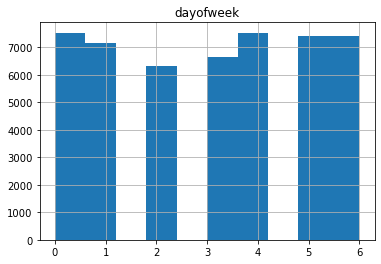

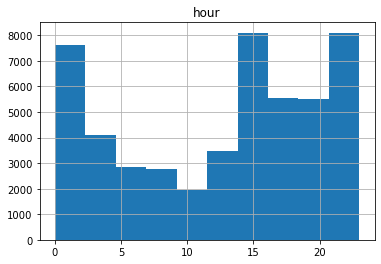

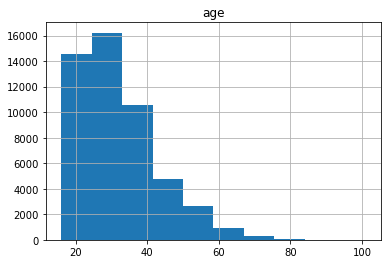

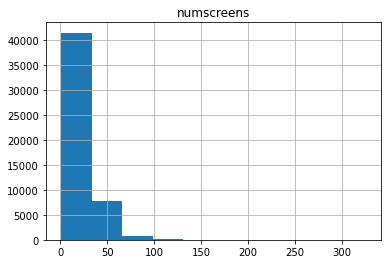

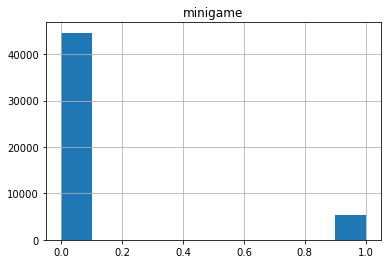

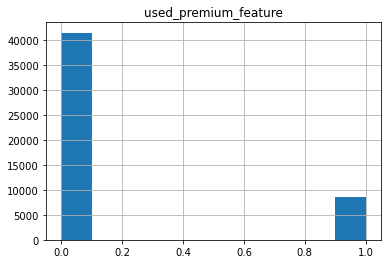

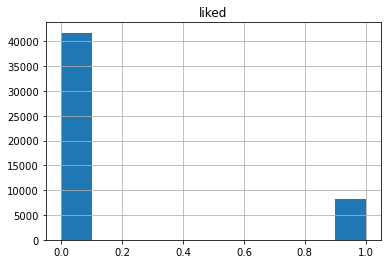

In [ ]:
# The simple way
for i in selected_appdata.columns:   
        selected_appdata.hist(i)

#### Q2. What do you observe
#### Answer 2

##### Histogram day of the week

Distribution of number of users for the day of the week when they installed the free app. The 7 days of the week are denoted by 0 to 6 starting from Sunday. Distribution is almost similar for all the days, For days Sunday, Thursday,Friday and Saturday we see nearly 7200 users each. Monday and Wednesday are slightly lower than the other days between 6800 - 7000 and Tuesday is the lowest with around 6200. Therefore the app is being installed at a similar rate on all days with a slight surge in and around weekend.

##### Histogram for Hour

The screen time of the users is preferably after 3pm which gets dropped a bit around 4pm to 8pm and again pick up the pace after 9pm. 

##### Histogram for Age

The audience has wide age range, 16 years to 101 years of age. The histogram has a right tail, all the data points are concentrated on the left, users are highest between 25 -35, we have less and less users as the age increases. There are around 15000 users in the age range 16 -25, 16000 between 25-30, 10000 between 30 - 40 and around 10000 above 40.

##### Histogram for Number of screens

This histogram tells us the number of screens visited by the user in a first 24-hours window. The number of screens visited by the user are less as around 42000+ users fall well within the visitation of 30 screens. That means users who have not visited more than these 30 screens are around 85%. These screens are seemingly good, and they contribute more for the user to stay in the app for a long time. We have high number of users who have only seen 0-5 screens.

##### Histogram for Minigame

There are around 44000+ users who have not played minigame, that’s around 90% of the entire users. While the only 10-12% of the users played the minigame.

##### Histogram for User who Premium Feature

It is a binary column and tells us if the user has used any premium feature during the free trial. 83%, approximately around 41700 users did not use any premium feature and around 17%, less than 8300 users of the total users used the premium features.

##### Histogram for Liked

This is the column that tells us if the user used the liked button even once while being on the app. Higher percentage, around 83%, approximately 41300 users did not like the app while only few users around 17%, approximately 8700 users of the total users have liked the app.

##### Conclusion

- There might be a similarities in pattern among people who have not used the premium features and people who didn’t like the app.

- We need to categorize our data into people who enrolled and  not enrolled to study these patterns as these are not completely expressive in the above histograms. The distribution of data in each bins/intervals can't be visualized clearly and therefore we are limited in our understanding of the data in terms of 'Skewness' due to limited bins/intervals that the default histogram offers.


In [ ]:
# separating enrolled and not enrolled data from enrolled column
enrolled     =  appdata[appdata["enrolled"] == 1]
not_enrolled  = appdata[appdata["enrolled"] == 0]

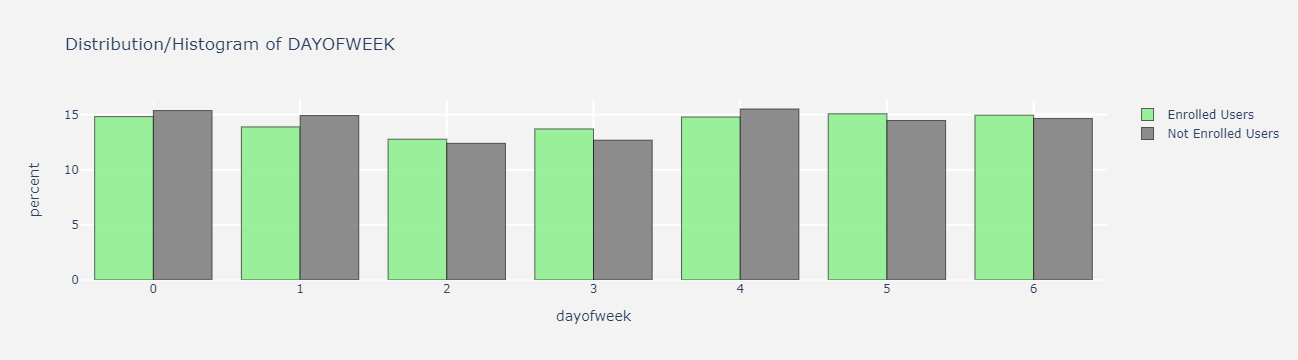

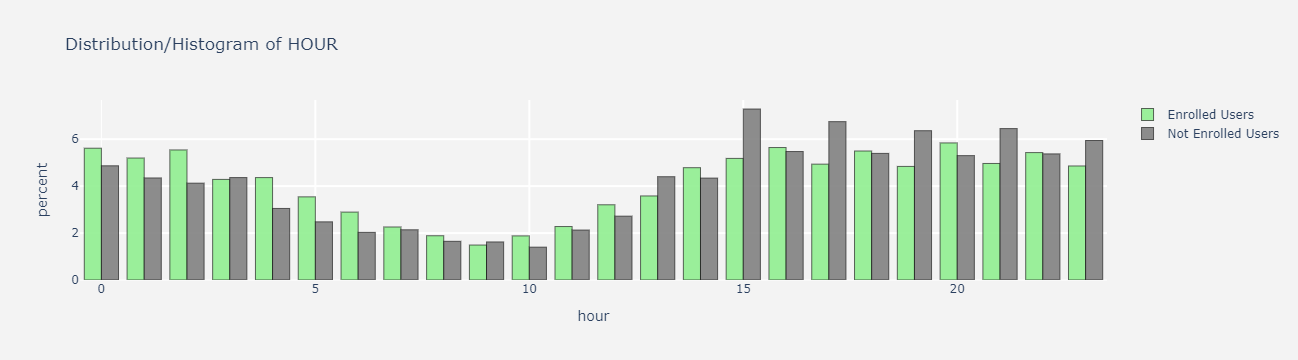

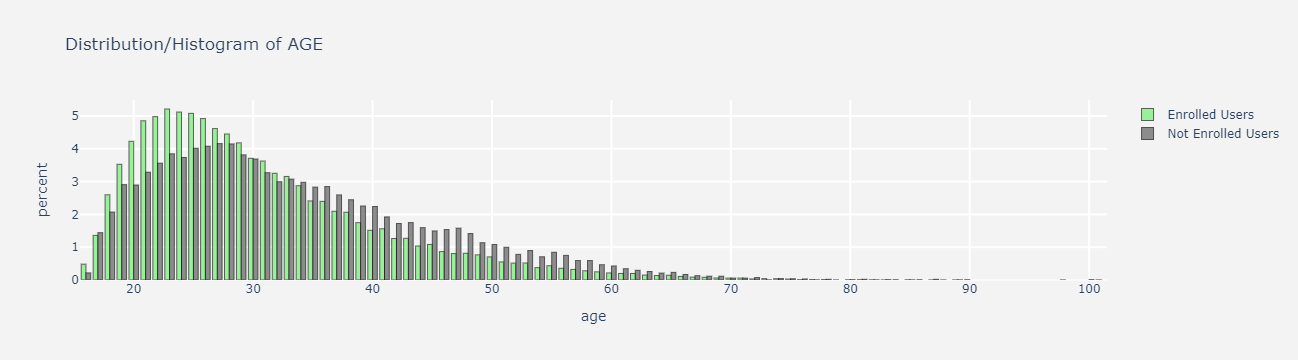

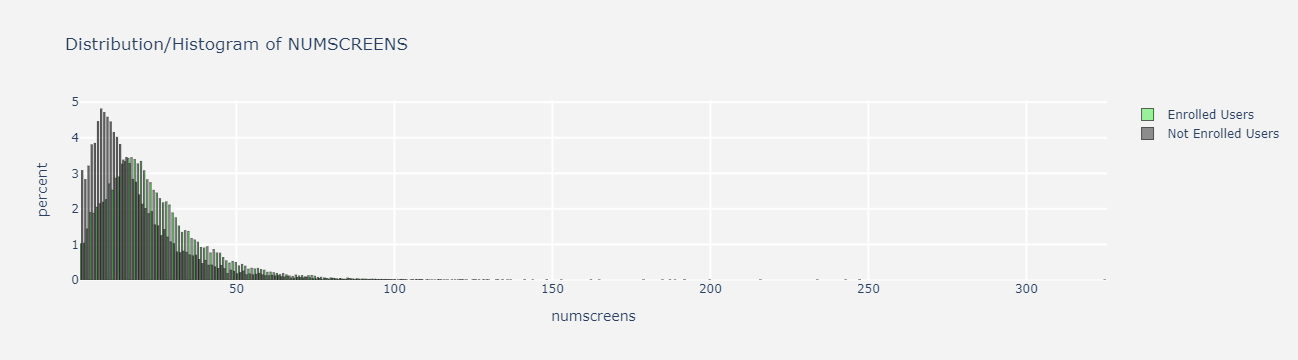

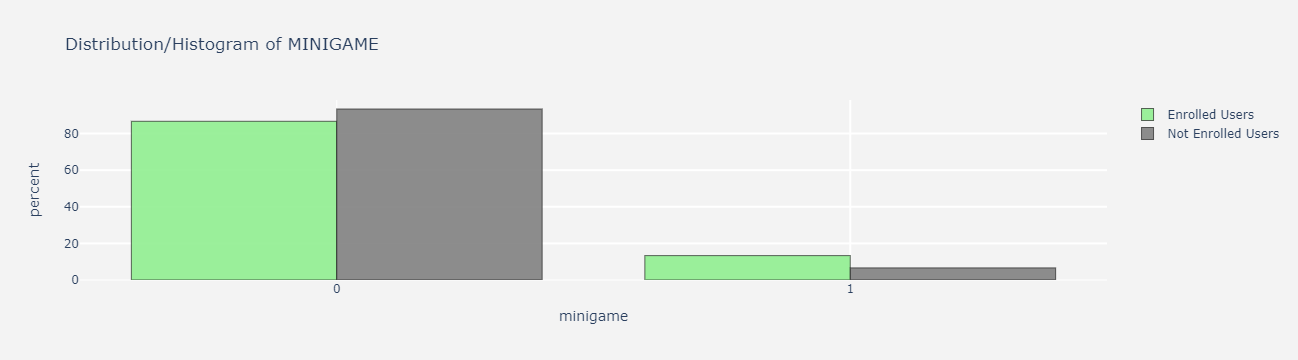

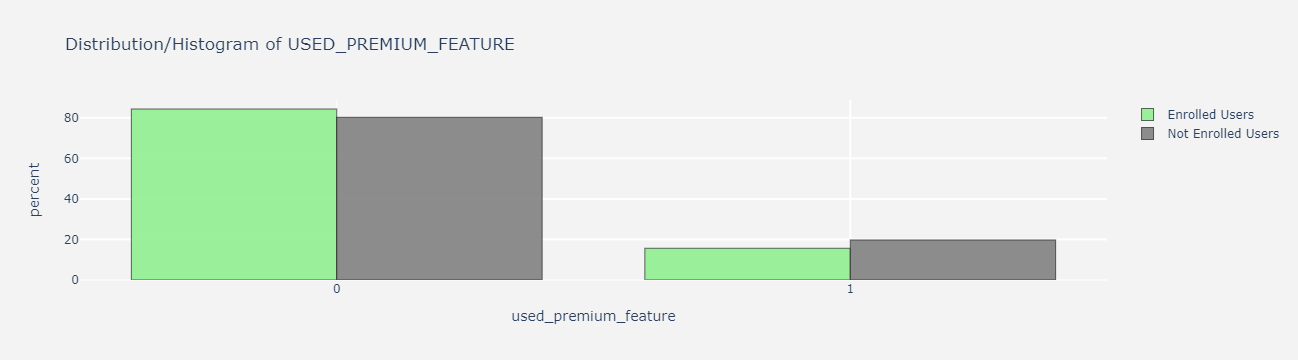

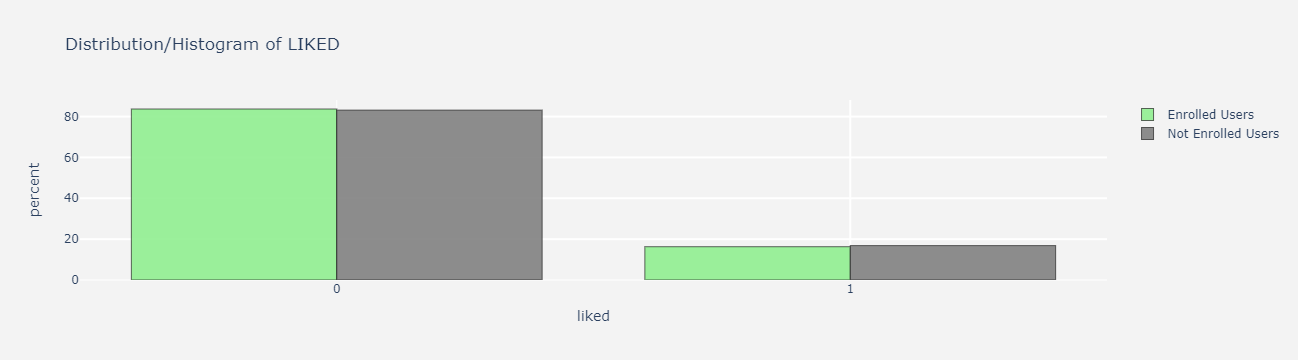

In [ ]:
# The complicated way or the nice way 
# use the code from the first project tweak it a little bit and create pretty looking histograms

#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = enrolled[column],
                          histnorm= "percent",
                          name = "Enrolled Users",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         marker_color='lightgreen',
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_enrolled[column],
                          histnorm = "percent",
                          name = "Not Enrolled Users",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                        )
                                 ),
                          marker_color='grey',
                          opacity = .9
                         )
    
    appdata1 = [trace1,trace2]
    layout = go.Layout(dict(title =" Distribution/Histogram of " + column.upper() ,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(appdata1,layout=layout)
    
    py.iplot(fig)

    #for all categorical columns plot histogram    
for i in selected_appdata :
    histogram(i)
plt.show()

The above histograms are more expressive.

1. Younger users have higher enrollment percentage, higher non enrollment rate among people above 40.  

2. Number of screens visited by not enrolled customers are way more than the enrolled customers. Distribution follows the right skew along the number-of-screens for not-enrolled-customers That means those customers are not staying in the app for a long-time. This Ares is having the very high scope for getting customers enrolled.

3. Higher number of users who used the premium feature did not enroll. 

4. Enrollment percentage is higher among people who played the minigame.

4. Day of the week and hour usage is similar among enrolled and not enrolled users.

<AxesSubplot:title={'center':'Correlation with Response Variable'}>

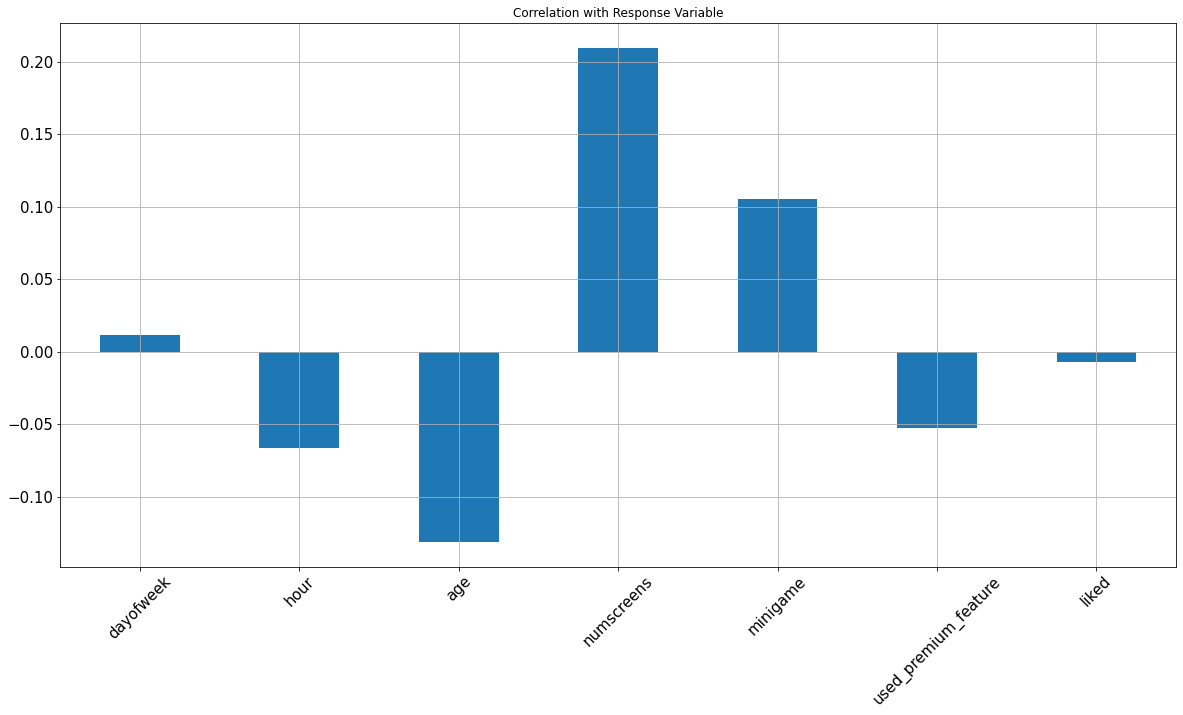

In [ ]:
# Correlation Plot with the Response variable
selected_appdata.corrwith(appdata.enrolled).plot.bar(figsize = (20, 10), title = 'Correlation with Response Variable', 
                                   fontsize = 15, rot = 45, grid = True)


#### Q3. Comment on the plot

#### Answer 3

Correlation explains us the extent of linear association of the variable of interest (Response Variable - enrolled) with the other individual variables. 

There are two variables which are positively associated with 'Enrolled'
1. 'Numscreens' - The number of screens visited by the users in last 24-hours is directly having a positive association between the customers who enrolled and this has the highest association (0.20%) among other variables.

2. Minigame is another variable to have the positive association with response variable with just above 0.10%. 

3. 'day of week' also has a positive correlation with the response variable that is with the increase in these variables the number of enrollments tend to increase.

There are two variables which are inversely/negatively associated with 'Enrolled'

1. 'Age' - The Age of the user is having a direct negative impact on enrollment higher the age, lesser the enrollment - 0.12%, people browe less. 

2. 'Used Premium Feature': If user used the premium feature, they are more likely to not enroll, the association is showing negative coorelation of - 0.05%.

3. 'hour', 'liked' are also inversely coorelated with enrollment that is with the increase in these variables have an inverse effect on the response variable.


## Correlation Plot the nicer way 

In [ ]:
# Set Background
sns.set(style = 'white', font_scale =2)
# Compute the matrix
corr = appdata.corr()
# Generate the mask for the upper triangle

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [ ]:
mask


array([[ True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False,  True]])

<AxesSubplot:>

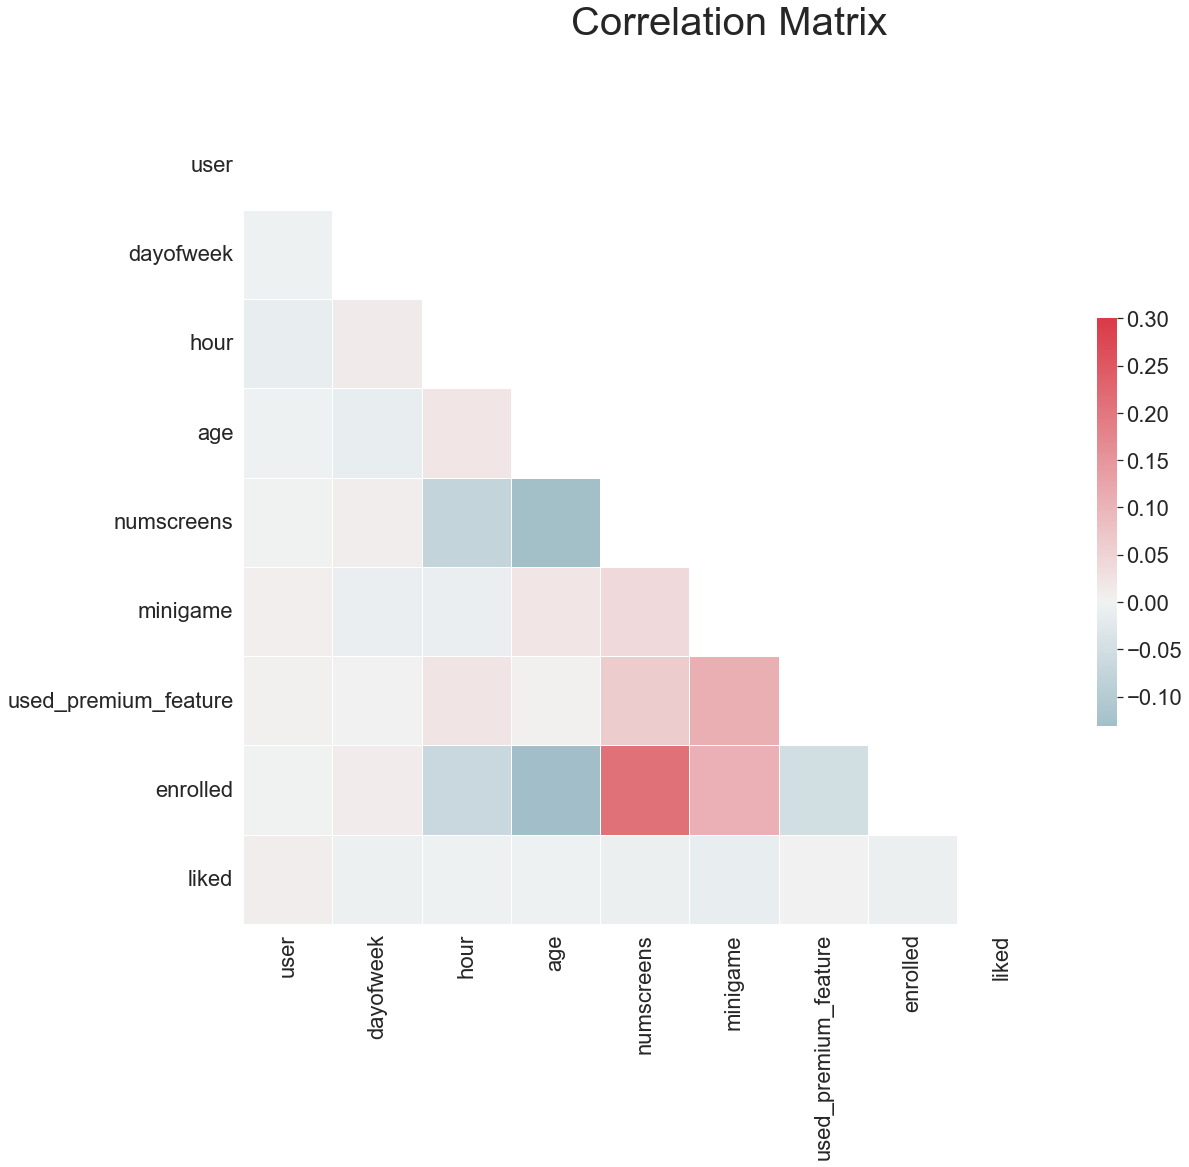

In [ ]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

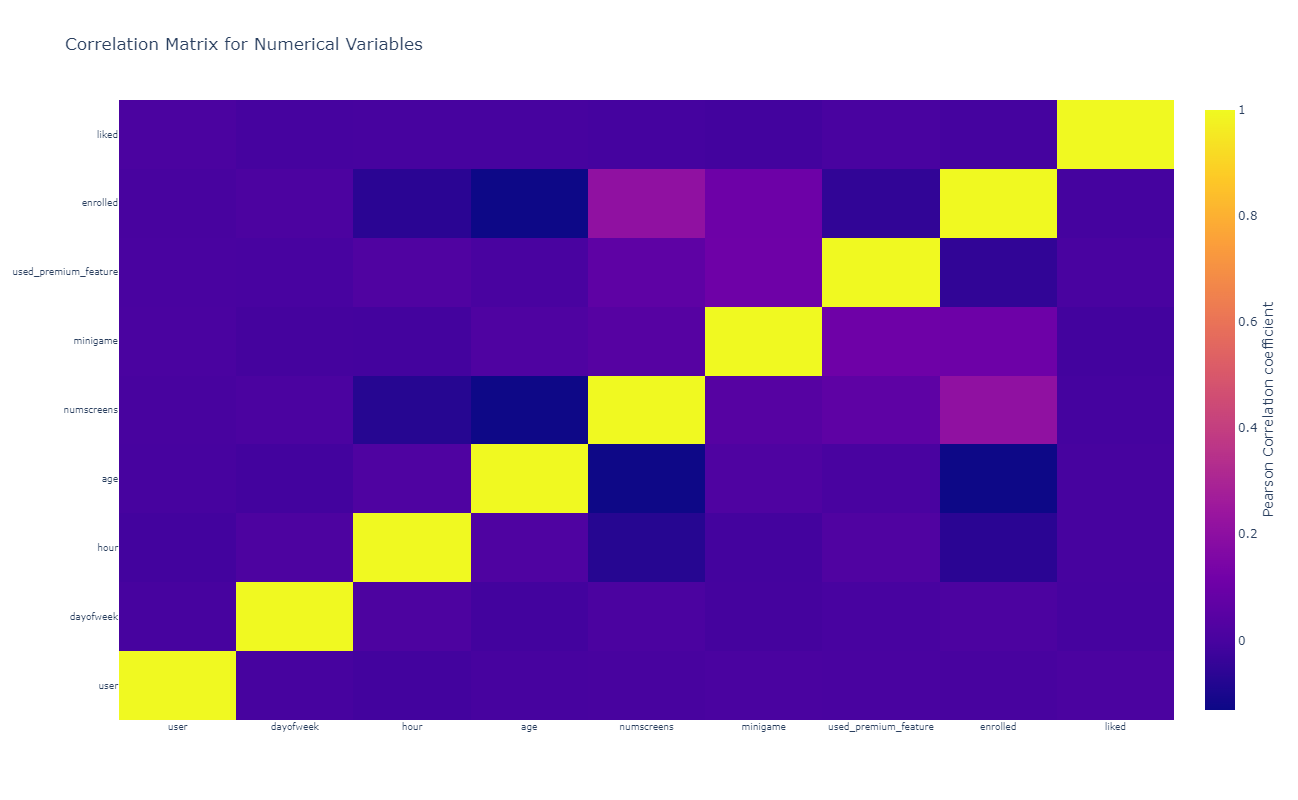

In [ ]:
#Create a heat map of correlation matrix by using the same code from the first project and tweaking it
# Should look something like what you see below

correlation = appdata.corr()

matrix_cols = correlation.columns.tolist()
    #axis = dict(showline  = True,
     #           zeroline  = False,
      #          gridcolor = "#fff",
       #         ticklen   = 4
        #       )
        
corr_array = np.array(correlation)  
correlation

trace = trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Plasma",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title  = 
                            "Correlation Matrix for Numerical Variables",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                           yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                           )
                      )
data   = [trace]
fig = go.Figure(data = data,layout = layout )
py.iplot(fig)

In [ ]:
correlation

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
user,1.000000,-0.002620,-0.012301,-0.003481,0.000058,0.006556,0.004130,-0.000519,0.007473
dayofweek,-0.002620,1.000000,0.013249,-0.012326,0.007925,-0.008631,0.001439,0.011326,-0.005737
hour,-0.012301,0.013249,1.000000,0.018859,-0.076756,-0.009120,0.022553,-0.066694,-0.001725
age,-0.003481,-0.012326,0.018859,1.000000,-0.128739,0.019745,0.004301,-0.131303,-0.002593
numscreens,0.000058,0.007925,-0.076756,-0.128739,1.000000,0.041154,0.061972,0.209457,-0.007349
minigame,0.006556,-0.008631,-0.009120,0.019745,0.041154,1.000000,0.108780,0.104979,-0.012250
used_premium_feature,0.004130,0.001439,0.022553,0.004301,0.061972,0.108780,1.000000,-0.052703,0.001690
enrolled,-0.000519,0.011326,-0.066694,-0.131303,0.209457,0.104979,-0.052703,1.000000,-0.007022
liked,0.007473,-0.005737,-0.001725,-0.002593,-0.007349,-0.012250,0.001690,-0.007022,1.000000


#### Q4. Comment on the heat map

- Pretty good visualization of correlation between the variables and the variable of interest is the usage of heat maps. The masked heat map is easier to read than the later. 
- It clearly denotes individual values of variables in a matrix with colour difference for the association. 
- Colour legend helps to know which color is pointing towards the association. The masked heat map removes the redundancy

**Observations**

- Enrollment has positive coorelation with number of screens visited by the user and those who played the minigame (which is 0.20% and 0.10% respectively).
- Enrollment has negative coorelation with age of the user,if they used premium feature and hour(which is -0.13%, -0.05%, and -0.06% respectively).
- Several features have weak negative and positive correlation among them for example Number of screens is also positively associated with premium feature and mini game but negatively  associated with age and hour( used_premium_feature and minigame(0.108), Age and numscreens(-0.128))

### Feature Engineering Process 
   ### Lets first look at the target variable (enrolled)

In [ ]:
# Check for the datatypes
appdata.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [ ]:
print(appdata['first_open'].max())
print(appdata['first_open'].min())

2013-07-09 15:52:39.983
2012-11-23 00:10:19.912


In [ ]:
# Convert date specific variables to datetime format
appdata['first_open'] = pd.to_datetime(appdata['first_open'])
appdata['enrolled_date'] = pd.to_datetime(appdata['enrolled_date'])

In [ ]:
# Check for the datatypes
appdata.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [ ]:
# Calculate the difference in the two dates to give the result in hours
appdata['diff_hours']=(appdata['enrolled_date']-appdata['first_open']).astype('timedelta64[m]')
appdata['diff_hours']=appdata['diff_hours']/60

In [ ]:
appdata.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,diff_hours
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.050000
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.083333


In [ ]:
appdata.diff_hours.describe()

count    31074.000000
mean       191.020003
std        621.968684
min          0.000000
25%          0.033333
50%          0.116667
75%         16.679167
max       5434.683333
Name: diff_hours, dtype: float64

In [ ]:
appdata[appdata["diff_hours"] > 17]["diff_hours"].count()

7744

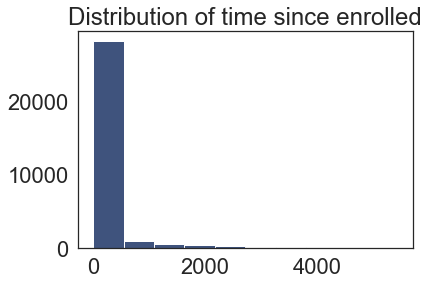

In [ ]:
# Plot histogram of the difference variable
plt.hist(appdata['diff_hours'].dropna(), color ='#3F537D')
plt.title('Distribution of time since enrolled')
plt.show()

#### Q5. Comment on the disribution
#### Answer 5.

'First open' is the date and time when the user opens the account. 'Enrolled date' is the date and time when customer enrolled into a paid membership of the app. Now the diffrence between these two dates gives us time taken by the customers to enroll. It is expreesed as hours. 25% of of enrolled customers enrolled in few minutes approx 3 minutes, next 25% in less than 12 min, next 25% took nearly 16 hours and around 7000 users took more than a day. More than 95% of enrolled users enrolled for the app within a day.

#### Q6. Why are we using dropna() here
#### Answer 6.

Users who are not enrolled, don't have enrolled_date, it is empty, hence for them the difference is NaN, while making our histograms we want to ignore those records. dropna() is a function which drops the null value rows in the dataframe.

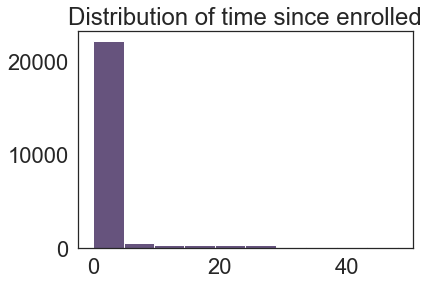

In [ ]:
# PLot histogram for only the 48 hrs 
plt.hist(appdata['diff_hours'].dropna(), color ='#66537D', range =[0, 48])
plt.title('Distribution of time since enrolled')
plt.show()

#### Q7. Why are we using the range in histogram
#### Answer 7.
We are using range 0,48 so that we can only look at the those who enrolled within 48 hours. 

#### Q8. Comment on the new time distribution
#### Answer 8.
The above histogram after specifying the range up to 48 hours 95% of users enrolled majorly under 5 hours and few before 48 hours. Few customers have delayed for more than 30 hours. 

In [ ]:
appdata_new=appdata.loc[appdata.diff_hours > 48, 'enrolled'] = 0

#### Q9. What is the purpose of the above code
#### Answer 9:

The above code is assigning the 'enrolled' column with '0' where customers have taken more than 48 hours to take paid membership. That means they are going to be considered as not enrolled for the analysis. 

This is a small group of 20% enrolled customers whom consulting again will help understand customer behaviour better. 

In [ ]:
# drop the difference, enrolled date and first open columns from the dataframe
appdata_new = appdata.drop(["diff_hours", "enrolled_date", "first_open"], axis = 1)
appdata_new.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


## Extra Feature Engineering Screens

In [ ]:
# Import the most popular screens (screens that the user visited in the first 24 hr. period)
# only one column so convert to an array
top_screens = pd.read_csv("popular_screens.csv").top_screens.values

In [ ]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [ ]:
# Separate screens into the separate lists
screen_list = top_screens.tolist()

In [ ]:
# Map screens to fields. We are adding a , so that we can count the screens because there is always going to be 1 less , for all the screen names
appdata_new['screen_list'] = appdata_new.screen_list.astype(str) + ','

In [ ]:
appdata_new['screen_list']

0        idscreen,joinscreen,Cycle,product_review,ScanP...
1        joinscreen,product_review,product_review2,Scan...
2                                       Splash,Cycle,Loan,
3        product_review,Home,product_review,Loan3,Finan...
4        idscreen,joinscreen,Cycle,Credit3Container,Sca...
                               ...                        
49995    Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...
49996                  Cycle,Splash,Home,RewardsContainer,
49997    joinscreen,product_review,product_review2,Scan...
49998    Cycle,Home,product_review,product_review,produ...
49999    product_review,ScanPreview,VerifyDateOfBirth,V...
Name: screen_list, Length: 50000, dtype: object

In [ ]:
for sc in top_screens:
    appdata_new[sc] = appdata_new.screen_list.str.contains(sc).astype(int)
    appdata_new['screen_list'] =appdata_new.screen_list.str.replace(sc + ",", "")

In [ ]:
appdata_new["other"] = appdata_new.screen_list.str.count(",")

In [ ]:
appdata_new= appdata_new.drop(columns=['screen_list'])

In [ ]:
appdata_new.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,10


## Create Funnels

In [ ]:
# Funnels
# Information is provided to you
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
appdata_new["SavingCount"] = appdata_new[savings_screens].sum(axis=1)
appdata_new=appdata_new.drop(columns=savings_screens)

# Credit monitoring screens
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
appdata_new["CMCount"] = appdata_new[cm_screens].sum(axis=1)
appdata_new = appdata_new.drop(columns=cm_screens)
# Credit card screens
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
appdata_new["CCCount"] = appdata_new[cc_screens].sum(axis=1)
appdata_new= appdata_new.drop(columns=cc_screens)
 # Loan screens
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
appdata_new["LoansCount"] = appdata_new[loan_screens].sum(axis=1)
appdata_new= appdata_new.drop(columns=loan_screens)

In [ ]:
appdata_new.dtypes

user                       int64
dayofweek                  int64
hour                       int32
age                        int64
numscreens                 int64
minigame                   int64
used_premium_feature       int64
enrolled                   int64
liked                      int64
location                   int32
Institutions               int32
VerifyPhone                int32
BankVerification           int32
VerifyDateOfBirth          int32
ProfilePage                int32
VerifyCountry              int32
Cycle                      int32
idscreen                   int32
Splash                     int32
RewardsContainer           int32
EditProfile                int32
Finances                   int32
Alerts                     int32
Leaderboard                int32
VerifyMobile               int32
VerifyHousing              int32
RewardDetail               int32
VerifyHousingAmount        int32
ProfileMaritalStatus       int32
ProfileChildren            int32
ProfileEdu

In [ ]:
appdata_new.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [ ]:
appdata_new.to_csv('new_appdata.csv', index = False) # Save the cleaned file

# Part 2

In [ ]:
# Read the saved file
df = pd.read_csv("new_appdata.csv")

In [ ]:
# Store it in another variable
X = df

In [ ]:
# Perform the head function
X.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [ ]:
# Create the response variable

Y = df['enrolled']

In [ ]:
# Drop it from the predictor variables

X = X.drop(columns='enrolled')

In [ ]:
# Import the train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Removing Identifiers

In [ ]:
# Keep user ID for associating the user ID to its prediction (Save before you remove it)
train_ID =X_train['user']

In [ ]:
# Drop it from the train set
X_train = X_train.drop(columns = 'user')

In [ ]:
# Keep user ID for associating the user ID to its prediction from the test set
test_ID =X_test['user']
# Drop it from the test set
X_test = X_test.drop(columns = 'user')

## Feature Scaling

In [ ]:
# import standard scalar function 
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_X = StandardScaler() # returns numpy array but looses the column names and index

In [ ]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [ ]:
# Convert the original into scaled set as all numerical features have been normalized
X_train=X_train2
X_test=X_test2

# Model Building 

In [ ]:
# import the appropriate model we will use LogisticRegression

from sklearn.linear_model import LogisticRegression

In [ ]:
# when you have a large number of features in your dataset, some of the Regularization techniques used to 
#  address over-fitting and feature selection are L1 (Lasso) and L2 (Ridge)
# We use them to avoid over-fitting

classifier=LogisticRegression(random_state=0,penalty='l1',solver='liblinear')

In [ ]:
# Fitting the model to the training set
# screens can be correlated to each other and we created the funnel features 
# other correlations may exist between screens. l2 regularization penalizes any particular field as penalty
# that is strongly correlated to the response variable
classifier.fit(X_train,y_train)

LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [ ]:
# Predicting the test set
y_pred=classifier.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [ ]:
# Evaluating the results and validate accuracy
# Buld the Confusion Matrix by importing the correct libraries
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
cm=confusion_matrix(y_test,y_pred)
cm

array([[3903, 1183],
       [1126, 3788]], dtype=int64)

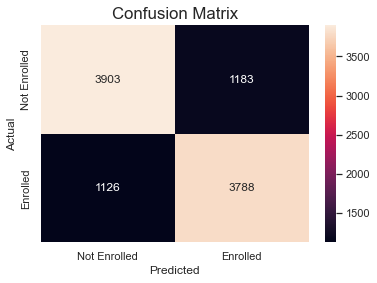

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt     

#calculate the confusion matrix
cm=confusion_matrix(y_test,y_pred, labels=[0,1])

#nicely print the confusion matrix
ax= plt.subplot()

sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
sns.set(font_scale=1.4)
ax.set_title('Confusion Matrix'); 

sns.set(font_scale=1.2)
ax.set_xlabel('Predicted');
ax.set_ylabel('Actual'); 

sns.set(font_scale=1)
ax.xaxis.set_ticklabels(['Not Enrolled', 'Enrolled']);
ax.yaxis.set_ticklabels(['Not Enrolled', 'Enrolled']);

In [ ]:
# Print the accuracy_score, precision_score, recall_score, f1_score
acc_score=accuracy_score(y_test,y_pred)
print("Accuracy Score ",acc_score)
print("Precision Score",precision_score(y_test, y_pred))
print("Recall Score  ",recall_score(y_test,y_pred))
print("F1 Score ",f1_score(y_test,y_pred))

Accuracy Score  0.7691
Precision Score 0.7620197143431905
Recall Score   0.7708587708587709
F1 Score  0.7664137582195244


In [ ]:
# K-fold Cross validation to different subsets of the training tests model works on every subset with 10 cv
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y = y_train, cv = 10)
print(f"Accuracies {accuracies}")
print("\n %0.2f accuracy with a standard deviation of %0.2f" % (accuracies.mean(), accuracies.std()))

Accuracies [0.77    0.7665  0.776   0.76875 0.76525 0.768   0.76325 0.767   0.773
 0.75875]

 0.77 accuracy with a standard deviation of 0.00


#### Q 10. Does the model hold true?
#### Answer 10

In this K-Fold Cross Validation Algorithm, it will help us in splitting the data as training and testing set for different rows each time. This will help the model to work on unseen data each time - Thus now it is less likely for the model to remember the data leads to avoid overfitting and it confirms that our data is not bias.

Repeating these steps for 10 times has given the almost same accuracy (cross validation score as printed above).

Finally, on comparing, K fold Cross validation and Logistic Regression is not having any significant difference in terms of accuracy. A big number of predictions (3788) were correctly predicted as Enrolled and 3903 not enrolled were predicted as not enrolled, as compared to 1126 incorrect predictions, also there were 1183 cases where the results were incorrectly predicted as Enrolled. However the model is 77% accurate which is similar to CV Fold.

Therefore, the Logistic Regression Model holds true.

## Model Conclusion 

In [ ]:
# Formatting the final results
final_results = pd.concat([y_test, test_ID], axis =1).dropna()

In [ ]:
final_results['predicted_results'] = y_pred

In [ ]:
# Reorder the columns so the final results look like this
final_results[['user','enrolled','predicted_results']].reset_index(drop=True).head(10)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0


In [ ]:
final_results["enrolled"].sum()


4914

In [ ]:
final_results["enrolled"].value_counts()

0    5086
1    4914
Name: enrolled, dtype: int64

In [ ]:
final_results["predicted_results"].sum()

4971

In [ ]:
final_results["predicted_results"].value_counts()

0    5029
1    4971
Name: predicted_results, dtype: int64

<AxesSubplot:>

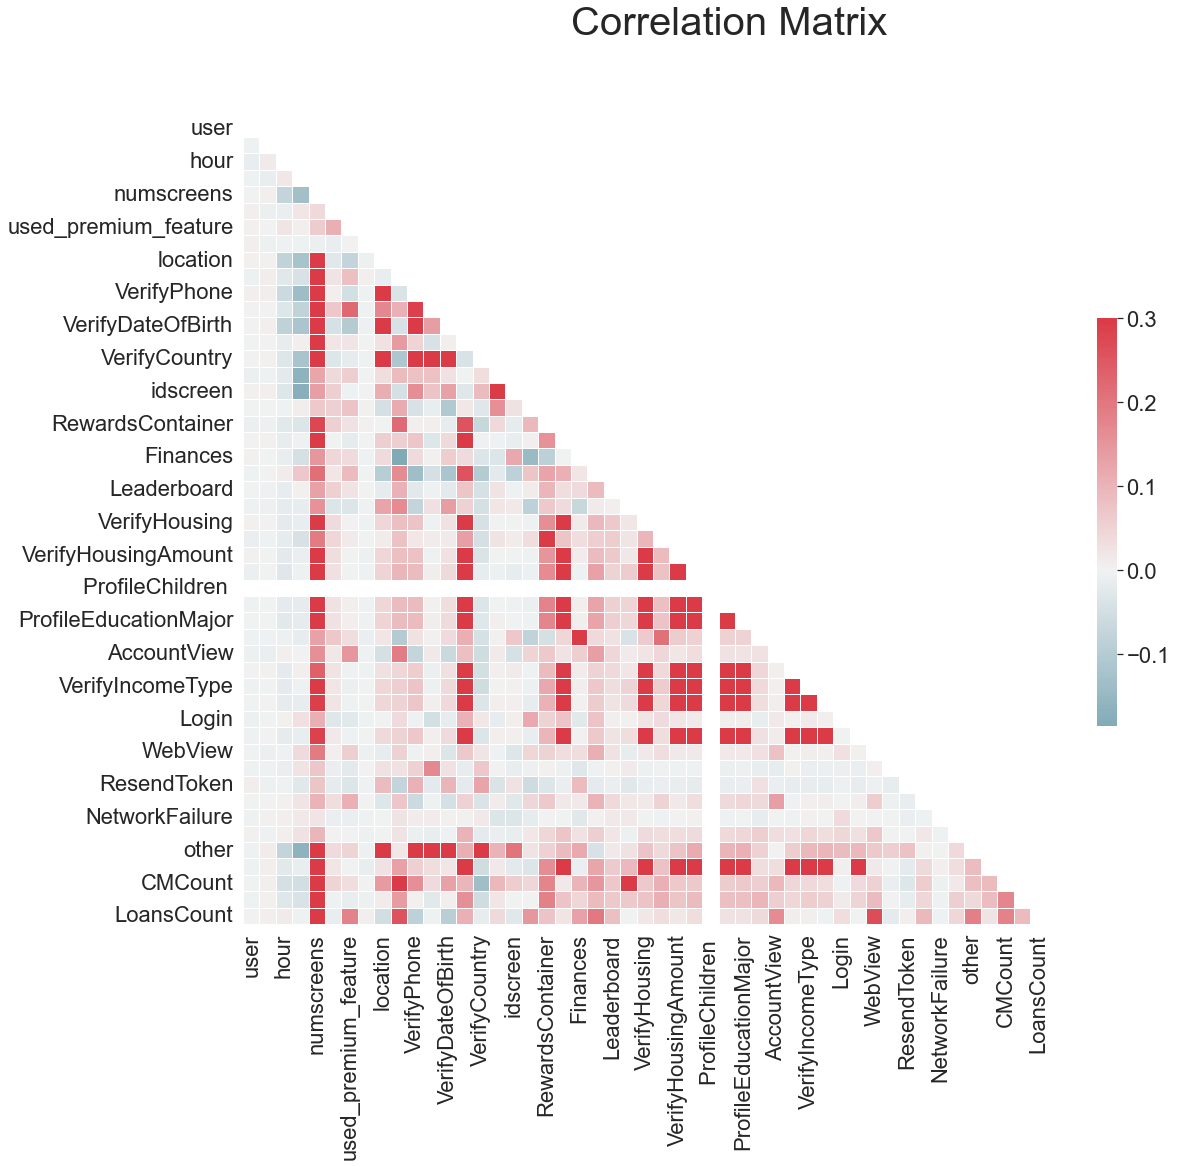

In [ ]:
# Set Background
sns.set(style = 'white', font_scale =2)
# Compute the matrix
corr = X.corr()
# Generate the mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Q 11. Provide recommendation to the marketing team based on the results. What has this model given us?
#### Answer 11.

Model has predicted whether the app user will enroll into paid membership based on the records. Specifically, the number of screens visited by the user is a greatest influencer among other variables as number of screens are highly corelated with enrolled status, we have done the feature engineering and through which we have selected the top screens only. From the Logistic regression, with Lasso regularization technique, we have eliminated less important features so that only more relevant data is sent into the model for training. This has produced 77% overall accuracy of the model.

#### Analytical Recommendation to Marketing Team:

Knowing the existing customer well is one of the important tasks that any marketing team must carry on in first place. Most of the business models will rely on this concept, which helps in concentrating not only a existing customers but also a target audience.

Based on the above results, it is clear that almost all actual values and predicted values are same, hence it is advisable for the marketing team to adopt the model for getting information of enrollment as well as team has to gear up the advertisement for coummunicating to target audience about the all services of the company and an application.

Target the users with predicted_results = 0 for re-targeting with bonus offers or discounts. The reason being even if some are wrongly predicted, the company won't be at loss to re-target them with promotional offers or discounts to the wrongly predicted = 0 users and it will be beneficial in the long run for the company as these users will have a lesser possibility of churning.

The marketing team can try to upsell and cross-sell certain other products to the already enrolled users which are also correctly predicted by the model. This will help to boost the company's revenue further. User journey (or user funnel) maps out how a user will be guided from install to purchase. It’s important to define the steps in this journey so the right events can be tracked and start learning where users churn. Looking at the conversion rates from step to step, the area of improvement can be identifiedcthat will result in increased revenue. Users need adequate onboarding to help them navigate app and know how to get the most out of their user experience. Without this, customers fail to appreciate the true value of the product. Onboarding experiences can be improved by making sure the first action is easy to achieve, using persona-based onboarding and simplifying sign-up process.

For example
- We saw that people who used prime feature were not enrolling we should try padding the onboarding experience with helpful “how-to”content covering those features. Measure adoption rates prior to and following the change.
- We saw that with age the customer onboarding decreased, try ramping up your support crew around those users, or surveying those users to uncover any unforeseen issues. 
- Notice that customers sign up within 6 hours, Offer incentives or discounts to entice them to stay during those key turning points.
- Take time to truly understand the customer journey - Determine which path is the most critical to success. “Critical paths to success” equate to sequences of actions a user takes that lead to enrollment.
- With the help of this model further dive into your most valuable customer segments? Which ones have the most potential to increase their spending habits, become brand ambassadors, identifying key segments will help maximizing ROI.
- Further study user reviews, as they play an important role in measuring app’s usability. Both positive and negative reviews can help us identify improvement areas in the design and user interface. We should be should be to minimizing the negative reviews and maximizing the positive ones.
- Number of Uninstalls per Week/Month. The number of times users uninstall app is another general indicator of app’s usability. Just like app downloads, it should also be measured weekly or monthly based on the general frequency of downloads. Poor user experience is one of the primary reasons apps get uninstalled.
- Measure App Usability by using any of the tools such as 
                                                     -- FLURRY ANALYTICS
                                                     -- GECKOBOARD
                                                     -- LOOKBACK
                                                     -- APPSEE
- Use A/B testing to improve funnel’s conversion rates
- Learn new ways in which app can grow.

We feel that many data points can be added by reviewing following questions in conjunction with data we have

- Whether the user is a first-time or returning user;
- How frequently the user is launching the app;
- How long a person uses the app per session;
- Which areas of the app are utilized during a particular session;
- How much time people spend on a given page or area of the app;
- What errors occur while the app is in use;
- What page(s) a person visited prior to uninstalling the app;
- What device and operating system each user is running;
- The loading time for the app and specific pages within the app;
- How long it takes the server to respond to the app’s request for data; and
- How long it takes data to travel from the server to the app.

They should look at this analysis inlight with following questions 
- What are the most common entry points to product purchase?
- What are the most popular paths to purchase?
- Which product features drive conversions or boost usage rates?
- Which perceived benefits resonate most with customers?
- How do discounts and incentives impact customer retention?
- Where are we losing customers and why?
- Define every step in the user journey.




In [ ]:
%%shell
ipython nbconvert --to html  AppBehaviourAnalysis.ipynb

##### References
1. https://mentormate.com/blog/usability-mobile-app/
2. https://7t.co/blog/how-do-mobile-app-analytics-work-are-they-different-from-web-analytics/